# Crawling Twitter

* We use the search API.

In [34]:
from IPython.display import Image, display, HTML

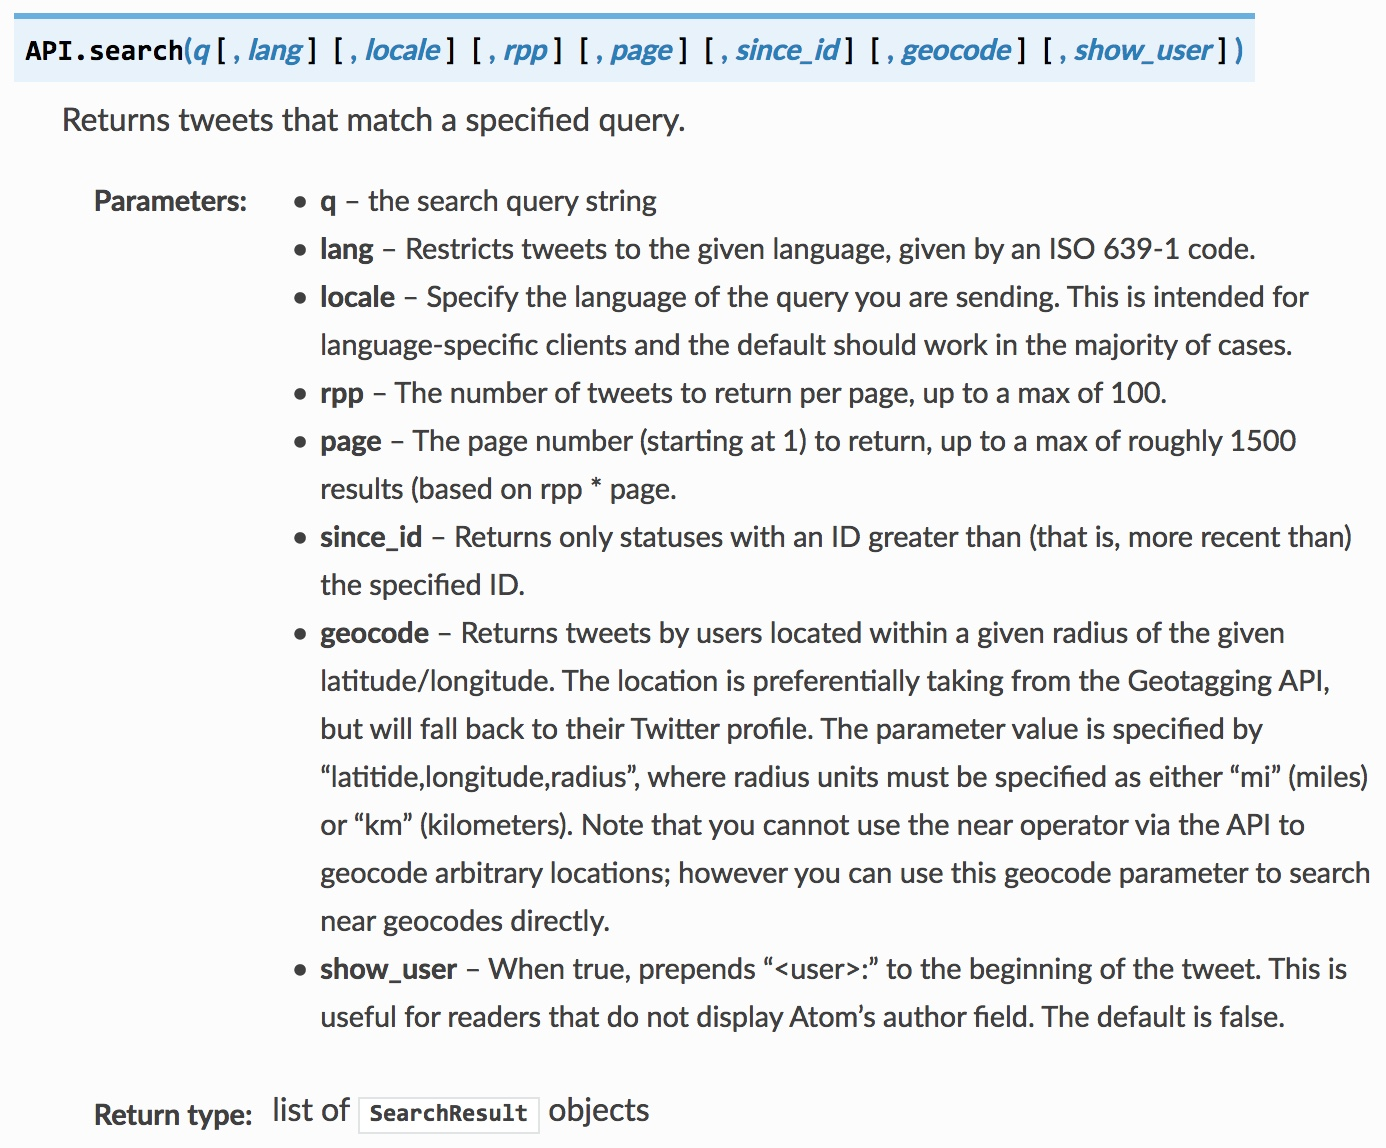

In [33]:
Image("./api_search.jpeg", width=800, height=700)
# For online, check here: http://docs.tweepy.org/en/v3.5.0/api.html 

* We get different types of objects.
* We also get a text object.

In [1]:
import tweepy
import argparse
import codecs
import time
import sys
import os
from IPython.display import clear_output

"""
The API class provides access to the entire twitter RESTful API methods. 
Each method can accept various parameters and return responses. 
For more information about these methods please refer to API Reference.
http://docs.tweepy.org/en/latest/getting_started.html
Authentication Tutorial: http://docs.tweepy.org/en/latest/auth_tutorial.html#auth-tutorial
"""
# Acquire and use your API_KEY and API_SECRET below since the ones in the following won't work.
# They are just placeholders:
auth = tweepy.AppAuthHandler("P220Bv9EHY4gOKPOq3w6wCm4", "uLk4cxqUbNuBaFShMgvc6EXFTv9rAyreRUE5Ed2XysCHYHL8w")
api = tweepy.API(auth, wait_on_rate_limit=True,
                   wait_on_rate_limit_notify=True)
if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)

In [4]:
   
def twitter_miner(query): 
    my_tweets=[]
    try:
        json_object=api.search(q=query, lang="fr", count=10)
        for i in json_object:
            tweet=i.text
            my_tweets.append(tweet)
    except tweepy.TweepError as e:
        print("some error : " + str(e))
        print("retrying in 20 seconds")
        time.sleep(20)
    return my_tweets 

new_tweets=twitter_miner("petite")
for t in new_tweets:
    print(t)

@Amir_Off Tu n'as pas changé @Amir_Off toujours la même petite frimousse 🤗
RT @11CarredAs11: Le traitement de la presse Mainstream a propos du @LeMediaTV est absolument incroyable.
Comment expliquer cette couvertur…
RT @besmatb: Eh sérieux qui se rappelle ici de the Undertaker, John Cena, Rey mysterio, Triple H, Randy Orton, Batista, Jeff Hardy, Edge et…
Quel Gros debile celui la... depuis quand on dit ça à une petite fille??? Et le pire c'est les gens qui applaudisse… https://t.co/H2aona8XJl
@Maskied @Nephthys_M Même a plus de 1000 km, après toutes ces années et même si on parle plus aussi souvent, je suis là mon petite cœur 😘💗
@Sandrine_Gruda @theborisdiaw VOILÀ !
Avec bien sur la petite célébration qui va bien ! https://t.co/9m8g5vI89k
RT @cel_ina: Pendant ce temps, ça traite de raciste une caricature de djihadiste et ça pleure sur une petite chanteuse qui aime tant tonton…
RT @TheLion2403: Bientot 2018 n'oublions pas:
#Franko🎙️ 
Coller la petite 🎶
50 000 000 de vues 🎥
10 000 000 de

#### Tweets seem to have internal new lines. Let's remove these.

#### We will do that by using a simple "replace" attribute on the tweet text.

In [62]:
def twitter_miner(query): 
    my_tweets=[]
    try:
        json_object=api.search(q=query, lang="en", count=50)
        for i in json_object:
            tweet=i.text
            tweet=tweet.replace('\n', ' ').encode('utf8')
            my_tweets.append(tweet)
    except tweepy.TweepError as e:
        print("some error : " + str(e))
        print("retrying in 20 seconds")
        time.sleep(20)
    return my_tweets 

new_tweets=twitter_miner("Vancouver")
for t in new_tweets[:10]:
    print(t)
    print("-"*100)

Being a REALTOR® in Vancouver is an exciting opportunity to help sellers and buyers with the #SALE #PURCHASE of the… https://t.co/g3SJf3mPY4
----------------------------------------------------------------------------------------------------
Want to work in #Vancouver, BC? View our latest opening: https://t.co/ABDkqVvdal #InvestmentBanking #Job #Jobs #Hiring #CareerArc
----------------------------------------------------------------------------------------------------
Want to work in #Vancouver, BC? View our latest opening: https://t.co/1AX1aqvoZu #mining #Clerical #Job #Jobs #Hiring #CareerArc
----------------------------------------------------------------------------------------------------
@VI_CYC @catlap I always get those mixed up.. And I'm literally from Vancouver smh
----------------------------------------------------------------------------------------------------
See our latest #Vancouver, BC #job and click to apply: Bookkeeper - https://t.co/BQLz8H9WhC #Accounting #Hiring #

## Part of speech tags

In [63]:
from nltk import word_tokenize, pos_tag
#--------------------------------------
def get_tagged_text(new_tweets):
    tagged_tweets=[]
    for t in new_tweets:
        try:
            tok=word_tokenize(t)
            tagged=pos_tag(tok)
            tagged_tweets.append(tagged)
        except:
            continue
    return tagged_tweets

#------------
tagged_tweets=get_tagged_text(new_tweets)
print(tagged_tweets[:10])
#------------

[[('Being', 'VBG'), ('a', 'DT'), ('REALTOR\xc2\xae', 'NNP'), ('in', 'IN'), ('Vancouver', 'NNP'), ('is', 'VBZ'), ('an', 'DT'), ('exciting', 'JJ'), ('opportunity', 'NN'), ('to', 'TO'), ('help', 'VB'), ('sellers', 'NNS'), ('and', 'CC'), ('buyers', 'NNS'), ('with', 'IN'), ('the', 'DT'), ('#', '#'), ('SALE', 'NNP'), ('#', '#'), ('PURCHASE', 'NNP'), ('of', 'IN'), ('the\xe2\x80\xa6', 'JJ'), ('https', 'NN'), (':', ':'), ('//t.co/g3SJf3mPY4', 'NN')], [('Want', 'VB'), ('to', 'TO'), ('work', 'VB'), ('in', 'IN'), ('#', '#'), ('Vancouver', 'NNP'), (',', ','), ('BC', 'NNP'), ('?', '.'), ('View', 'NNP'), ('our', 'PRP$'), ('latest', 'JJS'), ('opening', 'NN'), (':', ':'), ('https', 'NN'), (':', ':'), ('//t.co/ABDkqVvdal', 'JJ'), ('#', '#'), ('InvestmentBanking', 'NNP'), ('#', '#'), ('Job', 'NNP'), ('#', '#'), ('Jobs', 'NNP'), ('#', '#'), ('Hiring', 'NNP'), ('#', '#'), ('CareerArc', 'NNP')], [('Want', 'VB'), ('to', 'TO'), ('work', 'VB'), ('in', 'IN'), ('#', '#'), ('Vancouver', 'NNP'), (',', ','), ('BC',

In [86]:
def extract_word_by_pos(tagged_tweets, pos="JJ"):
    word_list=[]
    for t in tagged_tweets:
        for pair in t:
            if pair[-1]==pos:
                word_list.append(pair[0])
    return word_list

words=extract_word_by_pos(tagged_tweets, pos="JJ")
print(words)

['exciting', 'the\xe2\x80\xa6', '//t.co/ABDkqVvdal', '//t.co/1AX1aqvoZu', '@', 'mixed', 'up..', '//t.co/BQLz8H9WhC', '@', 'happy', 'Multiple', '@', '@', 'creative', 'liberal', 'high', '//t.co/0ceaVUopkb', 'average', 'detached', 'unidentifed', '//t.co/16S8oFZB8s', 'double', 'for\xe2\x80\xa6', '//t.co/TJ9nL1Ksga', 'average', 'detached', 'happy', 'favourite', '//t.co/LMi56kpyVu', 'timeshare-style', 't\xe2\x80\xa6', 'average', 'detached', '@', 'few', 'super', '\xf0\x9f\x92\x95', 'average', 'detached', 'front', '//t.co/h2eH9xSfvV', 'stop', '@', 'phisig150', '\xf0\x9f\x92\x8b', 'beat', 'terrible', 'rare', 'snow', 'beat', 'promising', 'average', 'detached', 'late', 'amazing', 'next', '@']


In [88]:
cleaned_words=[w for w in words if not "/" in w and not "@" in w]
for w in cleaned_words:
    print(w)

exciting
the…
mixed
up..
happy
Multiple
creative
liberal
high
average
detached
unidentifed
double
for…
average
detached
happy
favourite
timeshare-style
t…
average
detached
few
super
💕
average
detached
front
stop
phisig150
💋
beat
terrible
rare
snow
beat
promising
average
detached
late
amazing
next


In [91]:
def extract_word_by_pos(tagged_tweets, pos="JJ"):
    word_list=[]
    for t in tagged_tweets:
        for pair in t:
            w= pair[-1]
            if w==pos:
                if not "/" in w and not "@" in w:
                    word_list.append(pair[0])
    return word_list

words=extract_word_by_pos(tagged_tweets, pos="NNP")
for w in words[:20]:
    print(w)

REALTOR®
Vancouver
SALE
PURCHASE
Vancouver
BC
View
InvestmentBanking
Job
Jobs
Hiring
CareerArc
Vancouver
BC
View
Clerical
Job
Jobs
Hiring
CareerArc


* We also get a user object: (More info.: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object).

In [6]:
def get_twitter_user_data_by_query(query): 
    location_list=[]
    try:
        json_object=api.search(q=query, lang="en", count=50)
        for i in json_object:
            location=i.user.location
            #------------------------------
            location_list.append(location)
    except tweepy.TweepError as e:
        print("some error : " + str(e))
        print("retrying in 20 seconds")
        time.sleep(20)
    return location_list 

location_list=get_twitter_user_data_by_query("biryani")
unique_locations=set(location_list)
for l in unique_locations:
    print(l)


Lahore,Pakistan
Mind Palace
221B Baker Street
Mars
Tempe, Arizona 
Dubai ✈ Islamabad
Karachi, Pakistan
New York, USA
Newcastle Upon Tyne, England
near Biryani
karachi Pakistan
Kantō
33.690969, 73.013179
Britain 
🌎
🌍
UAE
Los Angeles
PAKISTAN
Vancouver, British Columbia
Finding my Jams
Milton , ON
beewell_network
the district
London, England
Lahore 
not your cup of tea 🐸
Auckland, New Zealand
Islamabd, Pakistan
Bradford, England
Dewsbury/Leeds, UK
Lahore, Pakistan 
Bengaluru, India


In [100]:
def get_twitter_user_data_by_query(query): 
    images=[]
    try:
        json_object=api.search(q=query, lang="en", count=50)
        for i in json_object:
            url=i.user.profile_image_url
            #------------------------------
            images.append(url)
    except tweepy.TweepError as e:
        print("some error : " + str(e))
        print("retrying in 20 seconds")
        time.sleep(20)
    return images 

images=get_twitter_user_data_by_query("UBC")
for l in images[:10]:
    print(l)

http://pbs.twimg.com/profile_images/932985931040198657/ZNxrOLJ7_normal.jpg
http://pbs.twimg.com/profile_images/461163601890267137/EuG1UG42_normal.png
http://pbs.twimg.com/profile_images/461163601890267137/EuG1UG42_normal.png
http://pbs.twimg.com/profile_images/845891422939037696/hfCP1t81_normal.jpg
http://pbs.twimg.com/profile_images/896938693872631808/9c8ECKUs_normal.jpg
http://pbs.twimg.com/profile_images/937489409104003072/l__X6sCt_normal.jpg
http://pbs.twimg.com/profile_images/457652049102925825/jCo95rEu_normal.jpeg
http://pbs.twimg.com/profile_images/954747371451281408/3PYqoBlH_normal.jpg
http://pbs.twimg.com/profile_images/345972017/6014_600195062734_61303892_37731922_2759155_n_normal.jpg
http://pbs.twimg.com/profile_images/655222333544665088/SU553lT4_normal.jpg


* Try also the following:
    *   user_screen_name=i.user.screen_name
    *   user_name=i.user.name
    *   lang=i.user.lang

# Get tweets by screen_name

In [114]:
# Acquire and use your API_KEY and API_SECRET below since the ones in the following won't work.
# They are just placeholders:
auth = tweepy.AppAuthHandler("P220Bv9EHY4gOKPOq3w6wCm43", "uLk4cxqUbNuBaFShMgvc6EXFTv9rAyreRUE5Ed2XysCHYHL8wy")
api = tweepy.API(auth, wait_on_rate_limit=True,
                   wait_on_rate_limit_notify=True)
if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)

def get_tweets_by_screen_name(screen_name="MIT"):
    user_tweets = []
    new_tweets = api.user_timeline(screen_name, count=200)
    user_tweets.extend(new_tweets)
    all_tweets= [tweet.text.encode("utf-8") for tweet in user_tweets]
    return all_tweets

mit_tweets= get_tweets_by_screen_name(screen_name="MIT")
for tweet in mit_tweets[:10]:
    print(tweet)

Study identifies neurons that fire at the beginning and end of a behavior as it becomes a habit.… https://t.co/cyyQf0T61b
Newly observed optical state could enable quantum computing with photons. https://t.co/6sZd2zGZXc https://t.co/rvRe2VrE0Z
RT @MIT_alumni: Two years after launch,  @MITSandbox celebrates the first acquisition of a supported startup with @EscherReality https://t.…
Ouch: Study reveals financial pain after hospitalization https://t.co/3iSQ8730X9 https://t.co/xcH0da40hw
RT @ScienceMIT: What's the difference between "brain" and "no brain"? 

Tomaso Poggio plumbs the depths of neural nets to understand how ou…
MIT economist David Atkin looks beneath the surface of global commerce. https://t.co/Wwosd53NSp https://t.co/z6rql8Tcgd
Private browsing gets more private https://t.co/jEDLK4C9ys https://t.co/AuOcXk8rOE
Human malaria parasites grown for the first time in dormant form https://t.co/gXiwMid2j8 https://t.co/JXFj7BiVMi
“I tell people that my life passion is to help other 

## Try UBC

In [115]:
ubc_tweets= get_tweets_by_screen_name(screen_name="UBC")
for tweet in ubc_tweets[:10]:
    print(tweet)

A natural curiosity about people led Jenn Lin to study psychology and create 'Humans of UBC Psych'… https://t.co/OGEa3cwu8P
The Musqueam Post during yesterday's snow storm. #UBC https://t.co/pwweoXg5XG
.@UBCSauderSchool BCom team wins second place at prestigious global event.  https://t.co/SR94X6S1nO https://t.co/mvpk3LyMV3
Snowy conditions at UBC Vancouver. Campus is open as normal. Transit conditions and delays are variable depending o… https://t.co/IZI5U0xn4S
The inaugural Robert and Ellen Silverman Piano Concerto Competition takes place on March 2 at @UBC_Music. Free to a… https://t.co/WNhwhDwqxB
Snow is falling and accumulating at UBC Vancouver. Campus is open as normal. Some transit issues. Drive safely.… https://t.co/8LWrOio2Uv
Snow is falling at UBC Vancouver. Campus is open as normal. Drive safely. https://t.co/ibWUbaKbRD for more info.
UBC Okanagan alumna Kelsey Serwa has won gold in women's ski cross at the Olympic Winter Games. Congratulations! https://t.co/2HqcyBQu7Z
Jenni

# Get up to 3,200 tweets

In [5]:
# Inspired by this script: https://gist.github.com/yanofsky/5436496.
def get_tweets_by_screen_name(screen_name="MIT"):
    user_tweets = []
    new_tweets = api.user_timeline(screen_name, count=200)
    user_tweets.extend(new_tweets)
    #-------------------------
    last_tweet=user_tweets[-1]
    oldest = last_tweet.id - 1
    while len(new_tweets) > 0:
        print "getting tweets before %s" % (oldest)
        new_tweets = api.user_timeline(screen_name, count=200, max_id=oldest)
        user_tweets.extend(new_tweets)
        # Update the id of last tweet
        last_tweet=user_tweets[-1]
        oldest = last_tweet.id - 1
    #---------------------------
    all_tweets= [tweet.text.encode("utf-8") for tweet in user_tweets]
    out_tweets= [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in user_tweets]
    
    return out_tweets

out_tweets= get_tweets_by_screen_name(screen_name="UBC")
for i in out_tweets[:10]:
    print(i)

getting tweets before 947249710842163199
getting tweets before 935918857063104512
getting tweets before 928730231845916671
getting tweets before 919957468494680063
getting tweets before 912037060961116160
getting tweets before 905188304563224575
getting tweets before 898286000715190272
getting tweets before 891009736459468800
getting tweets before 881195926378999807
getting tweets before 872932587924328448
getting tweets before 865587949605232640
getting tweets before 857242121920593924
getting tweets before 848569570877206527
getting tweets before 844215849644888064
getting tweets before 839538484482310143
getting tweets before 833731677092351999
getting tweets before 832739183827357695
[u'967573307502551041', datetime.datetime(2018, 2, 25, 1, 33, 47), "A natural curiosity about people led Jenn Lin to study psychology and create 'Humans of UBC Psych'\xe2\x80\xa6 https://t.co/OGEa3cwu8P"]
[u'967473728530477056', datetime.datetime(2018, 2, 24, 18, 58, 6), "The Musqueam Post during yeste

# Let's write to a file:

In [9]:
import csv
# Will write to a file "UBC_tweets.csv"
screen_name="UBC"
with open('%s_tweets.csv' % screen_name, 'wb') as f:
    writer = csv.writer(f, delimiter = ',', quoting=csv.QUOTE_ALL)
    writer.writerow(["tweet_id","created_at", "text"])
    writer.writerows(out_tweets)

In [11]:
!head -15 UBC_tweets.csv

# Let's work with the file:

In [1]:
import pandas as pd
ubc_tweets= pd.read_csv("UBC_tweets.csv", sep=",")
ubc_tweets.head()

,tweet_id,created_at,text
0,967573307502551041,2018-02-25 01:33:47,A natural curiosity about people led Jenn Lin ...
1,967473728530477056,2018-02-24 18:58:06,The Musqueam Post during yesterday's snow stor...
2,967431475573481472,2018-02-24 16:10:12,.@UBCSauderSchool BCom team wins second place ...
3,967162902712070144,2018-02-23 22:22:59,Snowy conditions at UBC Vancouver. Campus is o...
4,967160950204887042,2018-02-23 22:15:14,The inaugural Robert and Ellen Silverman Piano...


In [2]:
ubc_tweets_text=ubc_tweets["text"]
ubc_tweets_text.head()

0    A natural curiosity about people led Jenn Lin ...
1    The Musqueam Post during yesterday's snow stor...
2    .@UBCSauderSchool BCom team wins second place ...
3    Snowy conditions at UBC Vancouver. Campus is o...
4    The inaugural Robert and Ellen Silverman Piano...
Name: text, dtype: object

In [18]:
ubc_tweets_text[0]

"A natural curiosity about people led Jenn Lin to study psychology and create 'Humans of UBC Psych'\xe2\x80\xa6 https://t.co/OGEa3cwu8P"

In [22]:
ubc_tweets_text[1]

"The Musqueam Post during yesterday's snow storm. #UBC https://t.co/pwweoXg5XG"

In [23]:
from nltk import word_tokenize, pos_tag
for i in range(0, 10): # To loop over all tweets, replace the "10" with --> len(ubc_tweets_text)
    try:
        tweet=ubc_tweets_text[i]
        tokenized=word_tokenize(tweet)
        pos_tagged=pos_tag(tokenized)
        print(pos_tagged)
    except:
        continue

[('A', 'DT'), ('natural', 'JJ'), ('curiosity', 'NN'), ('about', 'IN'), ('people', 'NNS'), ('led', 'VBD'), ('Jenn', 'NNP'), ('Lin', 'NNP'), ('to', 'TO'), ('study', 'VB'), ('psychology', 'NN'), ('and', 'CC'), ('create', 'NN'), ("'Humans", 'NNS'), ('of', 'IN'), ('UBC', 'NNP'), ("Psych'\xe2\x80\xa6", 'NNP'), ('https', 'NN'), (':', ':'), ('//t.co/OGEa3cwu8P', 'NN')]
[('The', 'DT'), ('Musqueam', 'NNP'), ('Post', 'NNP'), ('during', 'IN'), ('yesterday', 'NN'), ("'s", 'POS'), ('snow', 'JJ'), ('storm', 'NN'), ('.', '.'), ('#', '#'), ('UBC', 'NNP'), ('https', 'NN'), (':', ':'), ('//t.co/pwweoXg5XG', 'NN')]
[('.', '.'), ('@', 'JJ'), ('UBCSauderSchool', 'NNP'), ('BCom', 'NNP'), ('team', 'NN'), ('wins', 'VBZ'), ('second', 'JJ'), ('place', 'NN'), ('at', 'IN'), ('prestigious', 'JJ'), ('global', 'JJ'), ('event', 'NN'), ('.', '.'), ('https', 'NN'), (':', ':'), ('//t.co/SR94X6S1nO', 'JJ'), ('https', 'NN'), (':', ':'), ('//t.co/mvpk3LyMV3', 'NN')]
[('Snowy', 'JJ'), ('conditions', 'NNS'), ('at', 'IN'), ('U

In [25]:
for i in range(0, 10): # To loop over all tweets, replace the "10" with --> len(ubc_tweets_text)
    try:
        tweet=ubc_tweets_text[i]
        tokenized=word_tokenize(tweet)
        pos_tagged=pos_tag(tokenized)
        # Concatenate items in the word, pos pair with "_"
        pos_tagged=[i[0]+"_"+i[1] for i in pos_tagged]
        # Join all the pair from a tweet into a long string
        pos_tagged=" ".join(pos_tagged)
        print(pos_tagged)
    except:
        continue

A_DT natural_JJ curiosity_NN about_IN people_NNS led_VBD Jenn_NNP Lin_NNP to_TO study_VB psychology_NN and_CC create_NN 'Humans_NNS of_IN UBC_NNP Psych'…_NNP https_NN :_: //t.co/OGEa3cwu8P_NN
The_DT Musqueam_NNP Post_NNP during_IN yesterday_NN 's_POS snow_JJ storm_NN ._. #_# UBC_NNP https_NN :_: //t.co/pwweoXg5XG_NN
._. @_JJ UBCSauderSchool_NNP BCom_NNP team_NN wins_VBZ second_JJ place_NN at_IN prestigious_JJ global_JJ event_NN ._. https_NN :_: //t.co/SR94X6S1nO_JJ https_NN :_: //t.co/mvpk3LyMV3_NN
Snowy_JJ conditions_NNS at_IN UBC_NNP Vancouver_NNP ._. Campus_NNP is_VBZ open_JJ as_IN normal_JJ ._. Transit_NNP conditions_NNS and_CC delays_NNS are_VBP variable_JJ depending_VBG o…_JJ https_NN :_: //t.co/IZI5U0xn4S_NN
The_DT inaugural_JJ Robert_NNP and_CC Ellen_NNP Silverman_NNP Piano_NNP Concerto_NNP Competition_NNP takes_VBZ place_NN on_IN March_NNP 2_CD at_IN @_JJ UBC_Music_NNP ._. Free_NNP to_TO a…_VB https_NN :_: //t.co/WNhwhDwqxB_NN
Snow_NNP is_VBZ falling_VBG and_CC accumulating_VB